In [49]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
import read_model_ID;
import calculate_cleavage_rate as clv
reload(read_model_ID);

## Load fit data and identify best fit

In [50]:
simset = []
no_good = []
final_par = []

chi_squared = []

file = '../fits_Stijn/19_3_2019/fit_19_3_2019_sim_'
parameters = np.loadtxt('example-params-2.txt')

#---------- collect simulations ---------------
for sim in range(1,26):
#for sim in [1,3,4,7,9,10,11,12,13,17,19,20,24,25,27,29,30,35,37,39,40,43,44,45,50]: #useful for 28_2_2019 run4
#for sim in [2,3,4,7,8,10,11,12,13,14,15,16,17,19,20]:
    sa = pd.read_csv(file +str(sim)+'.txt', delimiter='\t', index_col=False)
    filename = file +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    final_par_temp = sa.loc[len(sa)-1,'Parameter 1':'Parameter 41']
    final_par.append(final_par_temp.values)
    
best_fit = simset[np.argmin(chi_squared)]
print 'best fit: ' + best_fit
print 'all chi_squared: ' + str(chi_squared)

best fit: ../fits_Stijn/19_3_2019/fit_19_3_2019_sim_25.txt
all chi_squared: [435.415462605, 436.07055508800005, 457.083542739, 1369.97657605, 454.581891899, 427.802782069, 464.664938786, 432.859606651, 593.0679183990001, 454.57682325400003, 434.250629284, 1349.80720919, 458.584894174, 437.30751552699996, 443.596099589, 579.619134799, 460.574659578, 458.31668481099996, 446.721656859, 636.115532593, 462.00829005400004, 475.98302038699995, 463.61490337099997, 459.708260576, 412.941149348]


Text(0.5,1,'all final values of chi_squared')

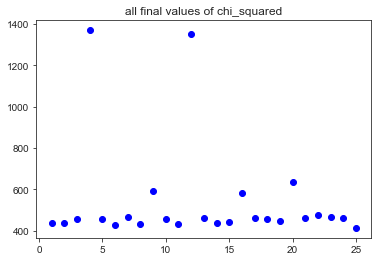

In [51]:
chi_squared = np.array(chi_squared)
indices_low_chi = np.where(chi_squared<1000)
final_par_low_chi = np.array(final_par)[indices_low_chi[0]]
plt.plot(range(1,len(chi_squared)+1),chi_squared,'bo')
plt.title('all final values of chi_squared')

## Finding Median

In [52]:
median = np.zeros(len(final_par_low_chi[0]))
for i in range(len(final_par_low_chi[0])):
    median_temp = list()
    for j in range(len(final_par_low_chi)):
        median_temp.append(final_par_low_chi[j][i])
    median[i] = np.median(np.array(median_temp))
    
print len(final_par_low_chi)
        

23


## Matches

Text(0.5,1,'matches')

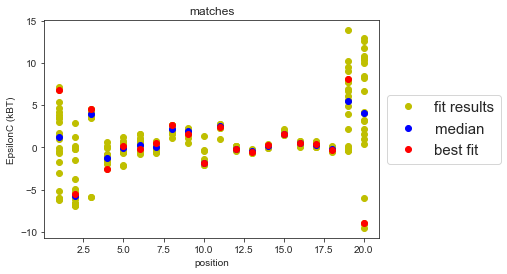

In [53]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),final_par_low_chi[i][0:20],'yo',label='fit results')
    
plot2, = plt.plot(range(1,21),median[0:20],'bo',label='median')
plot3, = plt.plot(range(1,21),final_par[np.argmin(chi_squared)][0:20],'ro',label='best fit')
#plot4, = plt.plot(range(1,21),parameters[0:20],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position')
plt.ylabel('EpsilonC (kBT)')
plt.title('matches')


## Mismatches

Text(0.5,1,'mismatches')

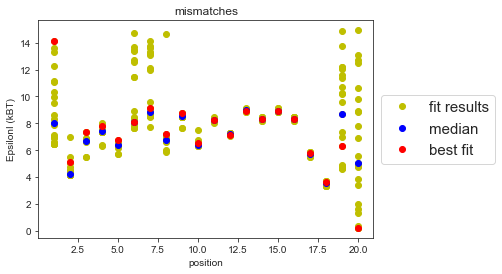

In [54]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),final_par_low_chi[i][20:40],'yo',label='fit results')

plot2, = plt.plot(range(1,21),median[20:40],'bo',label='median')
plot3, = plt.plot(range(1,21),final_par[np.argmin(chi_squared)][20:40],'ro',label='best fit')
#plot4, = plt.plot(range(1,21),parameters[20:40],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position')
plt.ylabel('EpsilonI (kBT)')
plt.title('mismatches')

## Energy Landscape

Text(0.5,1,'Energy landscape')

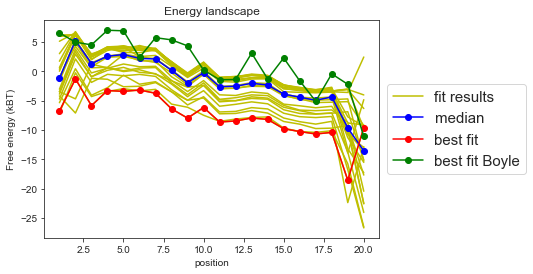

In [56]:
best_fit_boyle = np.loadtxt('best_fit.txt')
best_fit_boyle = (best_fit_boyle[2:22]-best_fit_boyle[1])

matrix = np.zeros([20,len(final_par_low_chi)])

plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),-np.cumsum(final_par_low_chi[i][0:20]),'y-',label='fit results')
    matrix[:,i] = -np.cumsum(final_par_low_chi[i][0:20])
    
medianmatrix = np.median(matrix, 1)
    
plot2, = plt.plot(range(1,21),medianmatrix,'b-o', label='median')    
plot3, = plt.plot(range(1,21),-np.cumsum(final_par[np.argmin(chi_squared)][0:20]),'r-o',label='best fit')
#plot4, = plt.plot(range(1,21),-np.cumsum(parameters[0:20]),'k-o',label='actual values')
plot5 = plt.plot(range(1,21),best_fit_boyle,'g-o',label='best fit Boyle')

plt.legend(handles=[plot1,plot2,plot3,plot5[0]],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position')
plt.ylabel('Free energy (kBT)')
plt.title('Energy landscape')
#plt.axis([0,21,-15,10])

## Forward rates

Text(0,0.5,'rate (/s)')

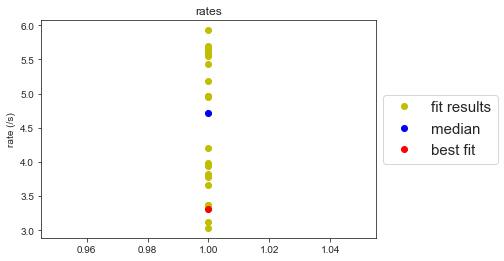

In [57]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,2),final_par_low_chi[i][40:41],'yo',label='fit results')

plot2, = plt.plot(range(1,2),median[40:41],'bo',label='median')
plot3, = plt.plot(range(1,2),final_par[np.argmin(chi_squared)][40:41],'ro',label='best fit')
#plot4, = plt.plot(range(1,4),parameters[40:43],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.title('rates')
plt.ylabel('rate (/s)')

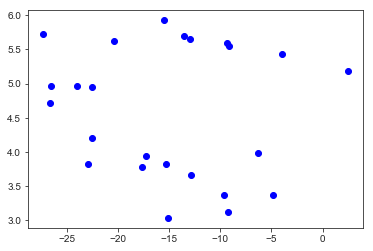

In [43]:
for i in range(len(final_par)):
    plt.plot(-sum(final_par[i][0:20]),final_par[i][40], marker = 'o', color = 'blue')

## Correlation plots different fit results

Text(0,0.5,'Fixed at 200 Hz')

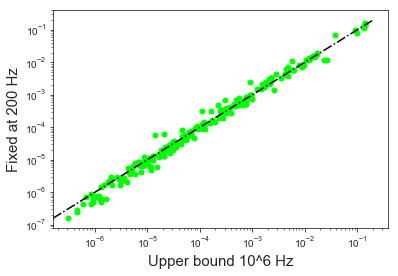

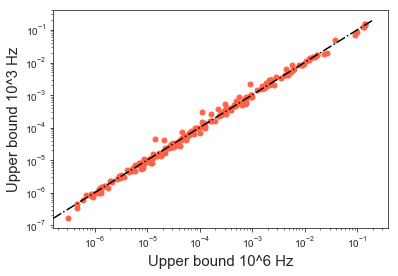

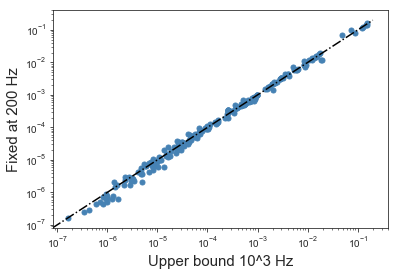

In [69]:
fitfile1 = '../fits_Stijn/13_3_2019/fit_13_3_2019_sim_13.txt' #free forward rate (10^6)
fitfile2 = '../fits_Stijn/19_3_2019/fit_19_3_2019_sim_25.txt' #fixed forward rate (200)
fitfile3 = '../fits_Stijn/14_3_2019/fit_14_3_2019_sim_23.txt' #constrained forward rate (10^3)

modelID1 = 'Clv_Saturated_general_energies_v2'
modelID2 = 'Clv_Saturated_fixed_kf_general_energies_v2'
modelID3 = modelID1

data1 = pd.read_table(fitfile1,index_col=False)
final_par1 = data1.loc[len(data1)-1,'Parameter 1':'Parameter 42']
final_par_np1 = final_par1.values
chi1 = data1.loc[:,'Potential'].values
data2 = pd.read_table(fitfile2,index_col=False)
final_par2 = data2.loc[len(data2)-1,'Parameter 1':'Parameter 41']
final_par_np2 = final_par2.values
chi2 = data2.loc[:,'Potential'].values
data3 = pd.read_table(fitfile3,index_col=False)
final_par3 = data3.loc[len(data3)-1,'Parameter 1':'Parameter 42']
final_par_np3 = final_par3.values
chi3 = data3.loc[:,'Potential'].values

kclv1 = []
kclv2 = []
kclv3 = []

kclv1.append(clv.calc_clv_rate_fast(final_par_np1,modelID1,[]))
kclv2.append(clv.calc_clv_rate_fast(final_par_np2,modelID2,[]))
kclv3.append(clv.calc_clv_rate_fast(final_par_np3,modelID3,[]))

for pos in range(1,21):
    kclv1.append(clv.calc_clv_rate_fast(final_par_np1,modelID1,[pos]))
    kclv2.append(clv.calc_clv_rate_fast(final_par_np2,modelID2,[pos]))
    kclv3.append(clv.calc_clv_rate_fast(final_par_np3,modelID3,[pos]))
    
for pos1 in range(1,20):
    for pos2 in range(pos1+1,21):
        kclv1.append(clv.calc_clv_rate_fast(final_par_np1,modelID1,[pos1,pos2]))
        kclv2.append(clv.calc_clv_rate_fast(final_par_np2,modelID2,[pos1,pos2]))
        kclv3.append(clv.calc_clv_rate_fast(final_par_np3,modelID3,[pos1,pos2]))

plt.loglog(kclv1,kclv2,marker='o',markersize=5,color='lime',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^6 Hz',fontsize=15)
plt.ylabel('Fixed at 200 Hz',fontsize=15)

plt.figure()
plt.loglog(kclv1,kclv3,marker='o',markersize=5,color='tomato',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^6 Hz',fontsize=15)
plt.ylabel('Upper bound 10^3 Hz',fontsize=15)

plt.figure()
plt.loglog(kclv3,kclv2,marker='o',markersize=5,color='steelblue',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^3 Hz',fontsize=15)
plt.ylabel('Fixed at 200 Hz',fontsize=15)

## RDP and Chi^2

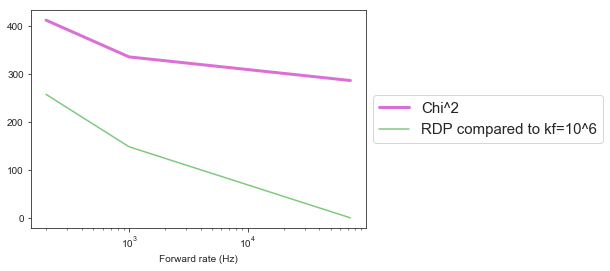

In [47]:
RDPtemp = np.zeros(len(kclv1))
for pos in range(len(RDPtemp)):
    RDPtemp[pos] = np.abs((kclv1[pos]-kclv2[pos])/kclv1[pos])
RDP2 = np.mean(RDPtemp)*1000

RDPtemp = np.zeros(len(kclv1))
for pos in range(len(RDPtemp)):
    RDPtemp[pos] = np.abs((kclv1[pos]-kclv3[pos])/kclv1[pos])
RDP3 = np.mean(RDPtemp)*1000

plt.semilogx([200,10**final_par_np3[40],10**final_par_np1[40]],[chi2[-1],chi3[-1],chi1[-1]],linewidth=3,color='orchid')
plt.semilogx([200,10**final_par_np3[40],10**final_par_np1[40]],[RDP2,RDP3,0])
plt.xlabel('Forward rate (Hz)')
plt.legend(['Chi^2','RDP compared to kf=10^6'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
